# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 66.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 55.7 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 67.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 73.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 68.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 72.6 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=a9571e90e43d80e45cb430252f4c6aa09504ab92b1e396418bdf1c2ab5ca0b8a
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [52]:
from torch.utils.data import DataLoader, random_split

# Define transforms
## YOUR CODE HERE ##
'''
transforms.Compose([...]):
This is a function that allows you to chain multiple transformations together. T
he transformations are applied sequentially to the input image data.

transforms.ToTensor():
    Converts a PIL image or a NumPy ndarray to a PyTorch tensor.
    The pixel values of the image are scaled from the range [0, 255] to [0.0, 1.0].
transforms.Normalize((0.5, 0.5), (0.5, 0.5)):
    This transformation normalizes the image data by subtracting the mean and dividing by the standard deviation 
        for each color channel.
    Mean and Standard Deviation: The first tuple (0.5, 0.5) represents the mean for the 
        channel, respectively. The second tuple ( 0.5, 0.5) represents the standard deviation for each channel.
    Normalization: After normalization, each channel will have values approximately in the range [-1, 1].
'''
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Split the dataset into training and validation sets (80% training, 20% validation)
train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size
train_dataset, val_dataset = random_split(training_data, [train_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=False)


# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)

test_loader = DataLoader(test_data, batch_size=100)

In [53]:
train_dataset

In [54]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**  
1. Transform to tensor:  Deep learning models expect input data in the form of tensors, as tensors are designed for efficient computation on GPUs.
2. Normalize with mean and standardad division to 0.5: this makes sure data is in the same scale and range. This helps stabilize and speed up the training process. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [55]:
print("Number of MNIST train data examples: {}".format(len(training_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 10000


In [56]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


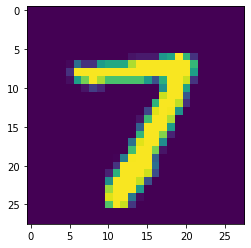

1


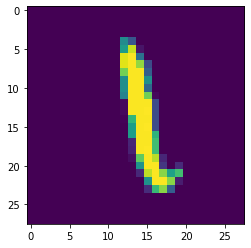

0


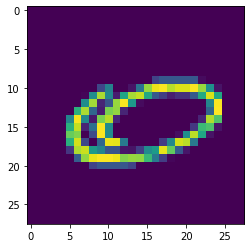

7


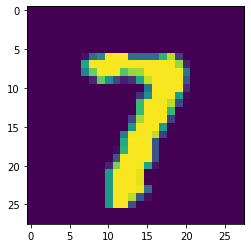

8


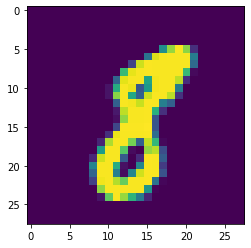

In [57]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [58]:
## YOUR CODE HERE ##

# Define the class for your neural network
'''
1. Fully Connected Layers: In a fully-connected layer, 
every neuron in the current layer has a direct connection to every neuron in the next layer

2. fully-connected layers expect a 1D vector as input. 
Flattening converts the multi-dimensional output into a 1D vector, making it compatible with fully-connected layers
'''
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [59]:
## YOUR CODE HERE ##

# Instantiate the model
net = Net()

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()



In [60]:
net

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [61]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [62]:
## YOUR CODE HERE ##

num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # Validation
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in val_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 88.51% training loss: 0.42511
Epoch 1 validation accuracy: 93.10% validation loss: 0.23579
Epoch 2 training accuracy: 94.90% training loss: 0.17558
Epoch 2 validation accuracy: 95.23% validation loss: 0.16417
Epoch 3 training accuracy: 96.34% training loss: 0.12390
Epoch 3 validation accuracy: 95.92% validation loss: 0.13620
Epoch 4 training accuracy: 97.14% training loss: 0.09372
Epoch 4 validation accuracy: 96.40% validation loss: 0.12006
Epoch 5 training accuracy: 97.82% training loss: 0.07321
Epoch 5 validation accuracy: 96.54% validation loss: 0.11202
Epoch 6 training accuracy: 98.18% training loss: 0.05870
Epoch 6 validation accuracy: 96.88% validation loss: 0.10645
Epoch 7 training accuracy: 98.52% training loss: 0.04757
Epoch 7 validation accuracy: 96.54% validation loss: 0.11406
Epoch 8 training accuracy: 98.75% training loss: 0.03992
Epoch 8 validation accuracy: 96.97% validation loss: 0.10700
Epoch 9 training accuracy: 99.09% training loss: 0.03035

Plot the training loss (and validation loss/accuracy, if recorded).

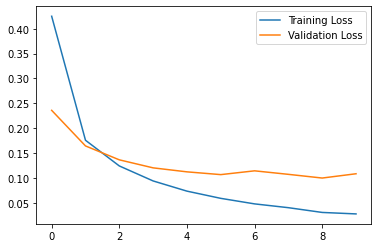

In [63]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [65]:
for epoch in range(num_epochs):
    net.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

Epoch 1 test accuracy: 99.99% test loss: 0.00112
Epoch 2 test accuracy: 100.00% test loss: 0.00022
Epoch 3 test accuracy: 100.00% test loss: 0.00015
Epoch 4 test accuracy: 100.00% test loss: 0.00012
Epoch 5 test accuracy: 100.00% test loss: 0.00009
Epoch 6 test accuracy: 100.00% test loss: 0.00008
Epoch 7 test accuracy: 100.00% test loss: 0.00007
Epoch 8 test accuracy: 100.00% test loss: 0.00006
Epoch 9 test accuracy: 100.00% test loss: 0.00005
Epoch 10 test accuracy: 100.00% test loss: 0.00005


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [66]:
## YOUR CODE HERE ##

# Add dropout = 0.2

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
        self.dropout=nn.Dropout(0.2)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net2 = Net2()

In [67]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net2.to(device)

Net2(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [68]:
# Choose an optimizer

# Add L2 regularization
optimizer = optim.Adam(net2.parameters(), lr=0.001, weight_decay=1e-4)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [70]:
num_epochs = 15

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # Validation
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in val_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 99.11% training loss: 0.02912
Epoch 1 validation accuracy: 96.96% validation loss: 0.11856
Epoch 2 training accuracy: 99.16% training loss: 0.02704
Epoch 2 validation accuracy: 96.96% validation loss: 0.11856
Epoch 3 training accuracy: 99.36% training loss: 0.02141
Epoch 3 validation accuracy: 96.96% validation loss: 0.11856
Epoch 4 training accuracy: 99.37% training loss: 0.02093
Epoch 4 validation accuracy: 96.96% validation loss: 0.11856
Epoch 5 training accuracy: 99.42% training loss: 0.01895
Epoch 5 validation accuracy: 96.96% validation loss: 0.11856
Epoch 6 training accuracy: 99.41% training loss: 0.01904
Epoch 6 validation accuracy: 96.96% validation loss: 0.11856
Epoch 7 training accuracy: 99.59% training loss: 0.01383
Epoch 7 validation accuracy: 96.96% validation loss: 0.11856
Epoch 8 training accuracy: 99.61% training loss: 0.01404
Epoch 8 validation accuracy: 96.96% validation loss: 0.11856
Epoch 9 training accuracy: 99.55% training loss: 0.01462

In [72]:
# Test
val_loss = 0.0
val_correct = 0
net2.eval()
for inputs, labels in test_loader:

    inputs, labels = inputs.to(device), labels.to(device)

    outputs = net2(inputs)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
val_loss_history.append(val_loss/len(test_loader))

Epoch 15 validation accuracy: 97.30% validation loss: 0.10662


## Saving your model
Using `torch.save`, save your model for future loading.

In [22]:
## YOUR CODE HERE ##
torch.save(Net, "Net.pth")
torch.save(Net2, "Net2.pth")